# Data Science Challenge
### Alejandra Neely

El siguiente notebook contiene el desarrollo del desafío técnico. El desafío tiene 5 secciones, para cada una primero se realiza el desarrollo en código y luego el desarrollo de la respuesta y conclusiones escritas.

### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [86]:
# Ignoramos mensajes warning
import warnings
warnings.filterwarnings('ignore')

# Importamos los datos
import pandas as pd
df = pd.read_csv('dataset_SCL.csv')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [87]:
# Obtenemos el tamaño inicial del dataset
df.shape

(68206, 18)

In [88]:
# Revisamos los nulos
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [89]:
# Hay un nulo, miramos qué otros valores hay en esa fila
df[df['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [90]:
df['Vlo-O'].dtype

dtype('O')

In [91]:
len(df['Vlo-O'].unique())

867

In [92]:
min(pd.to_numeric(df['Vlo-O'], errors = 'coerce'))

1.0

In [93]:
max(pd.to_numeric(df['Vlo-O'], errors = 'coerce'))

9956.0

In [94]:
df = df[df['Vlo-O'].notnull()]
# Confirmamos que realmente disminuimos una sola fila
df.shape

(68205, 18)

Al revisar la cantidad de nulos por cada variable, detectamos un solo nulo en la variable que indica el número de vuelo de operación del vuelo (Vlo-O). No queda muy claro el significado de esta variable, por eso fue necesario indagar un poco más. Es una variable categórica, que puede adoptar 867 valores que van entre el 1 y 9956. Como desconocemos si estos número tienen algún peso, no tenemos información suficiente como para decidir imputar, y al ser un solo caso dentro de 68206, eliminaremos la fila.

In [95]:
# Inspeccionamos el rango de fechas
df.groupby(['AÑO', 'MES']).size()

AÑO   MES
2017  1      6105
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64

In [96]:
# Inspeccionamos la cantidad de ciudades de origen, todos los vuelos son provenientes del aeropuerto de Santiago
df.groupby(['SIGLAORI']).size()


SIGLAORI
Santiago    68205
dtype: int64

In [97]:
# obtenemos la cantidad de ciudades de destino
len(df['SIGLADES'].unique())

62

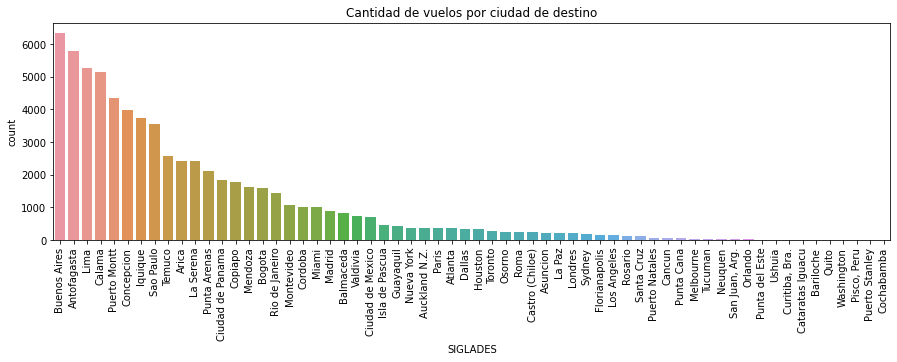

In [98]:
# Revisamos cómo se distribuye la cantidad de vuelos entre ciudades de destino
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.countplot(x="SIGLADES", 
    data= df,
    order=df['SIGLADES'].value_counts().index).set(title='Cantidad de vuelos por ciudad de destino')
#ax.tick_params(axis='x', rotation=90)
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

In [99]:
(df['SIGLADES'].value_counts()/df['SIGLADES'].value_counts().sum()*100)[0:9].sum()

59.806465801627446

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/4141328448.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


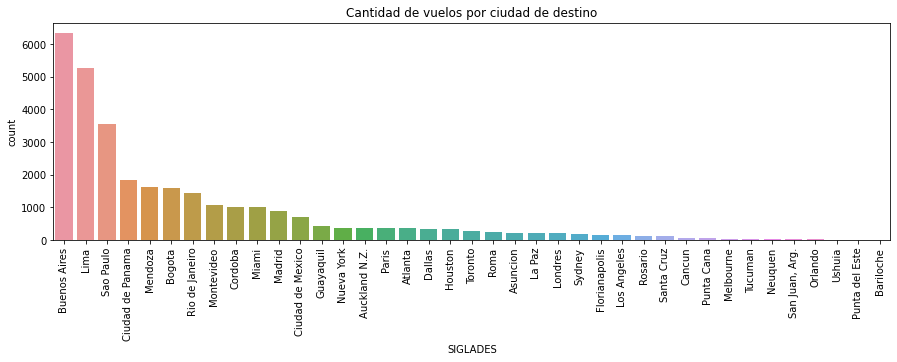

In [ ]:
# Revisamos cómo se distribuye la cantidad de vuelos entre ciudades de destino
fig, ax = plt.subplots()
ax = sns.countplot(x="SIGLADES", 
    data= df[df['TIPOVUELO'] == 'I'],
    order=df[df['TIPOVUELO'] == 'I']['SIGLADES'].value_counts().index).set(title='Cantidad de vuelos por ciudad de destino internacional')
#ax.tick_params(axis='x', rotation=90)
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()


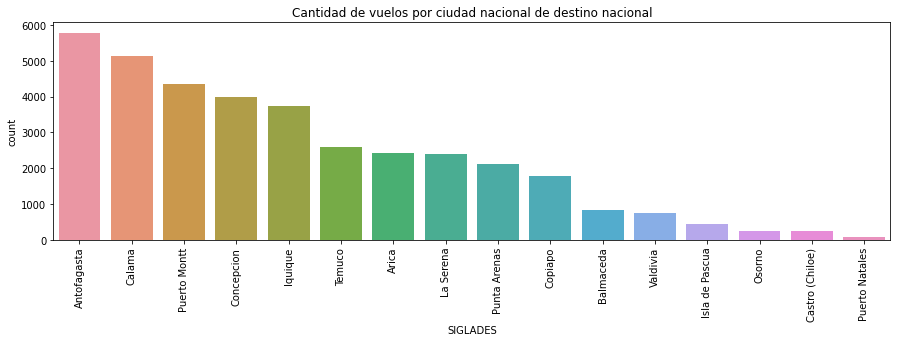

In [100]:
# Para observar mejor, separamos las ciudades internacionales de las nacionales
# Cantidad de vuelos por ciudades nacionales de destino

fig, ax = plt.subplots()
ax = sns.countplot(x="SIGLADES", 
    data= df[df['TIPOVUELO'] == 'N'],
    order=df[df['TIPOVUELO'] == 'N']['SIGLADES'].value_counts().index).set(title='Cantidad de vuelos por ciudad nacional de destino nacional')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

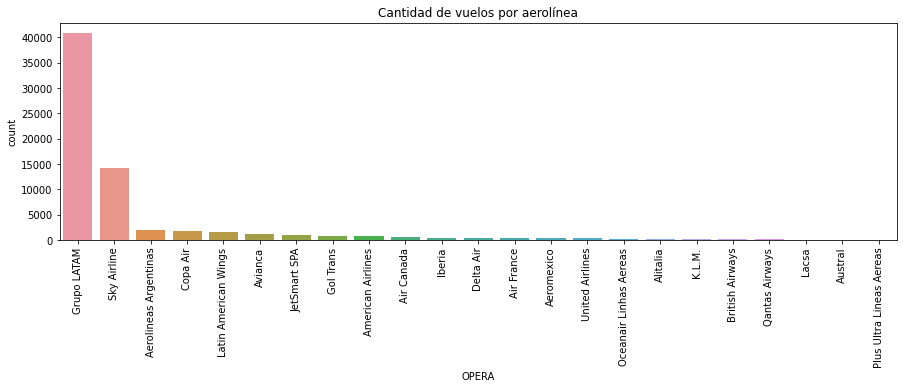

In [101]:
fig, ax = plt.subplots()
ax = sns.countplot(x="OPERA", 
    data= df,
    order=df['OPERA'].value_counts().index).set(title = 'Cantidad de vuelos por aerolínea')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

In [102]:
(df['OPERA'].value_counts()/df['OPERA'].value_counts().sum()*100)[0:3]

Grupo LATAM              59.954549
Sky Airline              20.963272
Aerolineas Argentinas     2.857562
Name: OPERA, dtype: float64

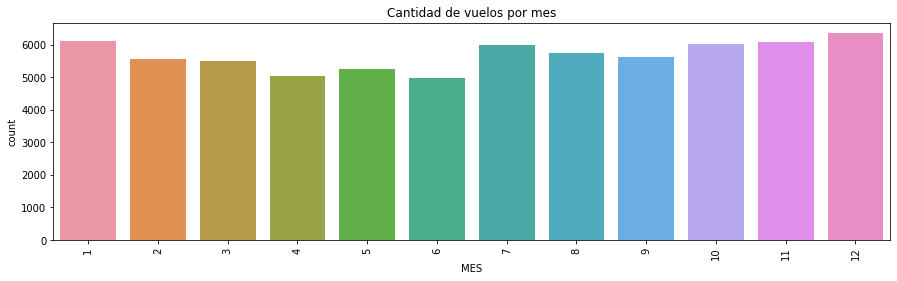

In [103]:
fig, ax = plt.subplots()
ax = sns.countplot(x="MES",
    data= df).set(title = 'Cantidad de vuelos por mes')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

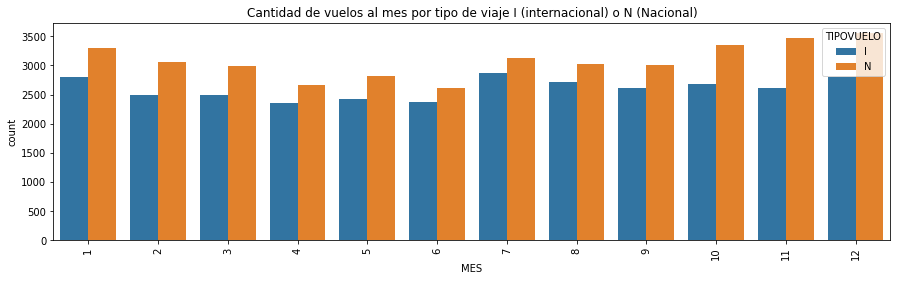

In [104]:
fig, ax = plt.subplots()
ax = sns.countplot(x='MES', hue = 'TIPOVUELO',
    data= df).set(title = 'Cantidad de vuelos al mes por tipo de viaje I (internacional) o N (Nacional)')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/88528808.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


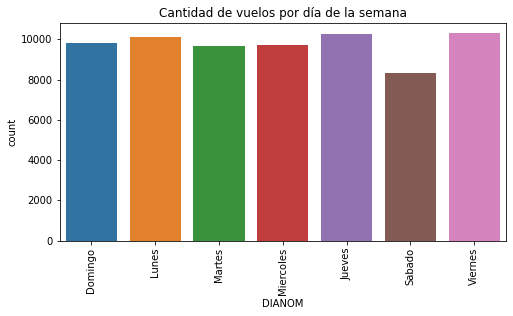

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x="DIANOM",
    data= df).set(title = 'Cantidad de vuelos por día de la semana')
fig.set_figwidth(8)
plt.xticks(rotation=90)
fig.show()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/4234342451.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


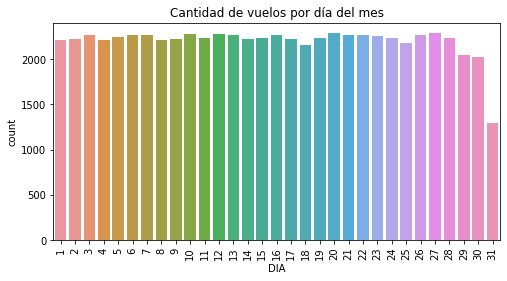

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x="DIA",
    data= df).set(title = 'Cantidad de vuelos por día del mes')
fig.set_figwidth(8)
plt.xticks(rotation=90)
fig.show()

#### Respuesta

**En cuanto a la inspección general de la data**
- Hay solo dos casos el año 2018, por lo que no sería útil en el futuro utilizar el año como variable predictora, sino mas bien agrupar por mes.

**En cuanto a las distribuciones de los vuelos**

*Ciudades de origen*

- Todos los vuelos provienen de Santiago

*Ciudades de destino*

- Hay un total de 62 destinos diferentes en la data.
- Buenos Aires es el destino con más vuelos. Los primeros 10 destinos cuentan por casi el 60% de los vuelos totales. Dentro de los 10 destinos más frecuentes 7 corresponden a ciudades de Chile,, y solo 3 destinos internacionales dentro del continente (regionales).
- Aperturamos por tipo de vuelo, internacional y nacional, y vemos que dentro del primer grupo se mantiene que los vuelos más frecuentes son los regionales. Siendo el más frecuente Buenos Aires, seguidos por Lima y Sao Paulo.  Al fijarnos solo en los vuelos nacionales vemos que Antofagasta y Calama son los destinos más frecuentes, lo cual probablemente se relaciona con la fuerte actividad minera del país. En tercer lugar está Puerto Montt, y luego Concepción, que son ciudades grandes en el sur de Chile a los que se llega para poder recorrer otras zonas del país, y además son ciudades donde los estudiantes suelen trasladarse a Santiago ya sea por estudios o trabajo, lo cuál podría explicar por qué son destinos con una alta demanda.

*Aerolíneas*

- Las 5 aerolíneas que operan los vuelos con más frecuencia son LATAM, Sky Airline, Aerolíneas Argentinas, Copa Air y Latin American Wings; luego le siguen Avianca y JetSmart SPA que también son bastantes conocidas. Este resultado se condice con la mayor frecuencia de vuelos con destinos nacionales y dentro del continente, ya que son aerolíneas que operan mayoritariamente vuelos dentro de Sud América.
- El Grupo LATAM concentra casi el 60% de los vuelos. Esto puede ser positivo, ya que podría obtenerse data más específica de este grupo de vuelos para evaluar si hay componentes manejables desde la compañía para mejorar la tasa de atrasos.

*Fechas y días*

- En cuanto a cantidad de vuelos por mes, vemos que la cantidad de vuelos es más o menos similar entre meses, observando igualmente una alza en meses de temporada alta, como las vacaciones de invierno en julio y las de verano en diciembre y enero.
Al separar el análisis anterior por tipo de vuelo nacional e internacional notamos que no hay diferencias en el patrón de frecuencia de vuelos. 
- En cuanto a días de la semana, el sábado es el día con menos vuelos, lo cual se podría explicar porque las personas que viajan por placer tienden a preferir quedarse en sus destinos el día sábado aprovechando que es un día no laboral, mientras que las personas que viajan por negocios pueden también preferir volver antes a sus ciudades de origen para pasar tiempo con sus familias y/o descansar antes de comenzar una nueva semana laboral.
- En cuanto a días del mes, vemos que hay una leve baja los últimos del mes. El día 31 tiene la menor cantidad de vuelos, pero esto es obvio ya que solo algunos meses tienen 31 días, por lo que no es un indicador importante, aunque sí debería tomarse en consideración a la hora de entrenar un modelo considerando fechas exactas.


### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

##### temporada_alta

In [20]:
# Chequeamos si variable fecha está seteada como tipo fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [21]:
# Fechas tienen asignado el tipo "Object", por lo que la transformamos a datetime
df[['Fecha-I', 'Fecha-O']] = df[['Fecha-I', 'Fecha-O']].apply(pd.to_datetime)

In [22]:
# Chequeamos que la transformación se hizo correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68205 non-null  datetime64[ns]
 1   Vlo-I      68205 non-null  object        
 2   Ori-I      68205 non-null  object        
 3   Des-I      68205 non-null  object        
 4   Emp-I      68205 non-null  object        
 5   Fecha-O    68205 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68205 non-null  object        
 8   Des-O      68205 non-null  object        
 9   Emp-O      68205 non-null  object        
 10  DIA        68205 non-null  int64         
 11  MES        68205 non-null  int64         
 12  AÑO        68205 non-null  int64         
 13  DIANOM     68205 non-null  object        
 14  TIPOVUELO  68205 non-null  object        
 15  OPERA      68205 non-null  object        
 16  SIGLAORI   68205 non-null  object       

In [23]:
# Creamos la variable temporada_alta
import numpy as np
df["temporada_alta"] = np.where((df["Fecha-I"].between("2017-12-15 00:00:00", "2017-12-31 23:59:59") |
                                df["Fecha-I"].between("2017-01-01 00:00:00", "2017-03-03 23:59:59") |
                                df["Fecha-I"].between("2017-07-15 00:00:00", "2017-07-31 23:59:59") |
                                df["Fecha-I"].between("2017-09-11 00:00:00", "2017-09-30 23:59:59")), 1, 0)

# Chequeamos que no haya nada extraño en la construcción de la variable
df['temporada_alta'].value_counts()

0    45444
1    22761
Name: temporada_alta, dtype: int64

In [24]:
print('Un {}% de los vuelos corresponden a vuelos de temporada alta'.format(round(len(df[df['temporada_alta'] == 1]) / len(df) * 100)))

Un 33% de los vuelos corresponden a vuelos de temporada alta


##### dif_min

In [25]:
# Creamos la variable dif_min
# La variable indica los minutos de atraso, números negativos implica que el vuelo partió antes
df['dif_min'] = df['Fecha-O'] - df['Fecha-I']
df['dif_min'] = df['dif_min'].astype('timedelta64[m]')

# Chequeamos que no haya nada extraño en la construcción de la variable
df['dif_min'].describe()

count    68205.000000
mean         9.110945
std         19.313514
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

##### atraso_15

In [26]:
# Creamos la variable atraso_15 : 1 si dif_min > 15, 0 si no.
df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x > 15 else 0)

# Chequeamos que no haya nada extraño en la construcción de la variable
df['atraso_15'].value_counts()

0    55591
1    12614
Name: atraso_15, dtype: int64

In [27]:
print('Un {}% de los vuelos tienen un atraso mayor a 15 minutos'.format(round(len(df[df['dif_min'] > 15]) / len(df) * 100)))

Un 18% de los vuelos tienen un atraso mayor a 15 minutos


##### periodo_dia

In [28]:
#Creamos la variable periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .
df.loc[df['Fecha-I'].dt.hour.between(5, 12), 'periodo_dia'] = 'AM'
df.loc[df['Fecha-I'].dt.hour.between(12, 19), 'periodo_dia'] = 'PM1'
df.loc[df['Fecha-I'].dt.hour.between(19, 23), 'periodo_dia'] = 'PM2'
df.loc[df['Fecha-I'].dt.hour.between(00, 5), 'periodo_dia'] = 'PM2'

#Chequeamos que todo este bien, que haya distribución entre value counts y que estén solo los valores especificados
df['periodo_dia'].value_counts()

PM1    25506
AM     22837
PM2    19862
Name: periodo_dia, dtype: int64

In [29]:
print('Del total de vuelos, el {}% tienen horario de departure en la mañana,'.format(round(len(df[df['periodo_dia'] == 'AM']) / len(df) * 100)),
'el {}% tienen horario de departure en la tarde'.format(round(len(df[df['periodo_dia'] == 'PM1']) / len(df) * 100)),
'y el {}% tienen horario de departure en la noche'.format(round(len(df[df['periodo_dia'] == 'PM2']) / len(df) * 100)))

Del total de vuelos, el 33% tienen horario de departure en la mañana, el 37% tienen horario de departure en la tarde y el 29% tienen horario de departure en la noche


In [30]:
# Creamos .csv con data nueva
synthetic_features = df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']]
synthetic_features.to_csv('synthetic_features.csv', encoding = 'latin1')

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [105]:
# Importamos función de functions.py que crea gráficos a partir de la tasa de atrasos mayores de 15 minutos por vuelo
from functions import delay_rate

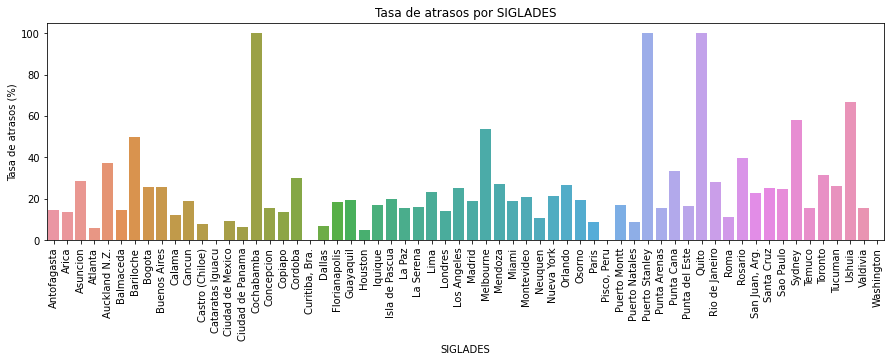

In [32]:
delay_rate(df, 'SIGLADES')

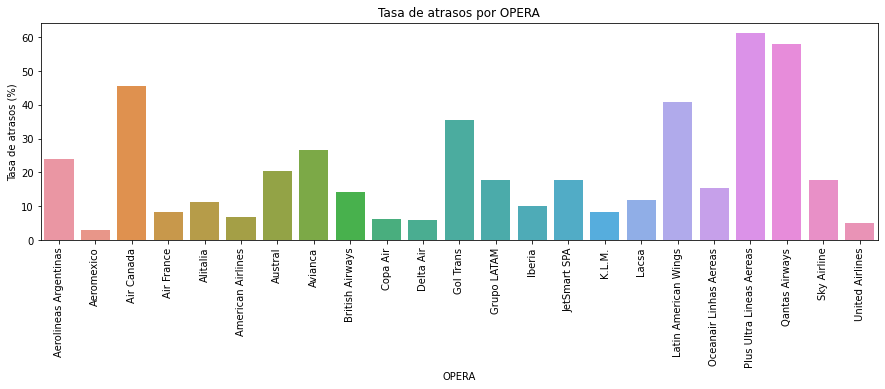

In [33]:
delay_rate(df, 'OPERA')

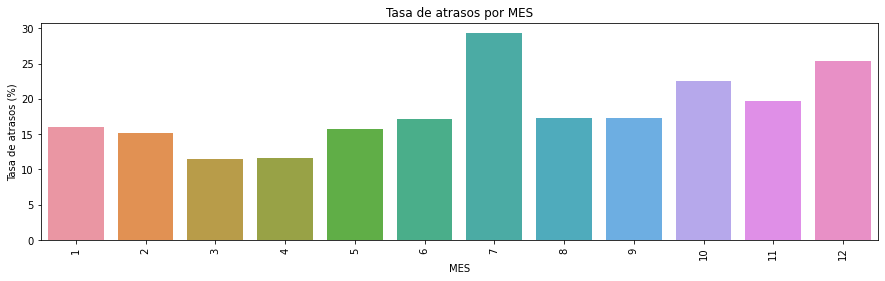

In [34]:
delay_rate(df, 'MES')

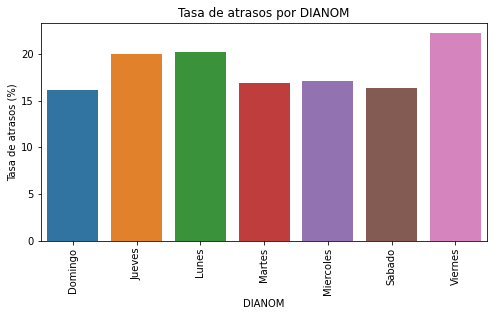

In [35]:
delay_rate(df, 'DIANOM', width = 8)

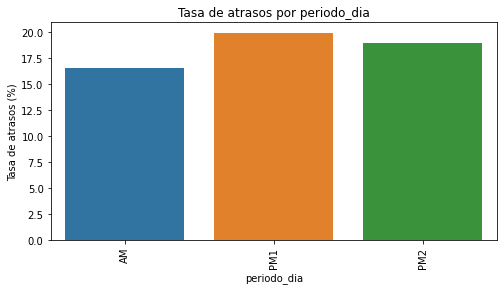

In [36]:
delay_rate(df, 'periodo_dia', width = 8)

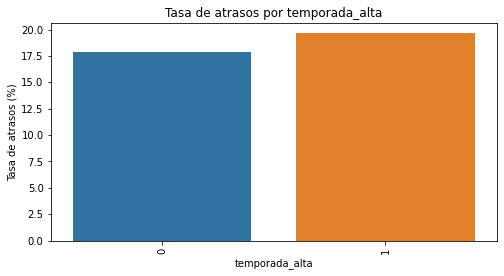

In [37]:
delay_rate(df, 'temporada_alta', width = 8)

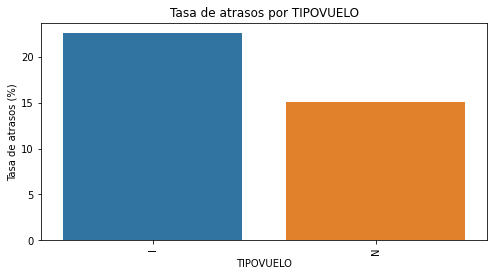

In [38]:
delay_rate(df, 'TIPOVUELO', width = 8)

#### Respuesta

- Hay ciudades con cerca de un 100% de atrasos y con cerca de un 0% de atrasos, miraremos más en detalle estos casos para saber si tienen algún patrón común y concluir si es necesario quitarlos o no por su baja frecuencia.
- Se observa además que la tasa de atrasos es mayor en Julio y Diciembre, lo cual, nuevamente, se condice con el inicio de vacaciones en Chile. Em cuanto a días de la semana también vemos un alza en la tasa de atrasos es los días lunes, jueves y viernes. En cuanto a período del día las diferencias son de alrededor de un 3% por lo que puede nos er un indicador muy relevante. 
- En cuanto a la temporada, la diferencia en la cantidad de atrasos es aún menor entre temporadas que entre períodos del día por lo que también parece no ser relavante para predecir atrasos.
- Las variables más relevantes parecen ser ciudad de destino, aerolínea que opera, mes y día de la semana.


A partir del análisis anterior surgen las siguientes ideas por explorar a continuación:
- Vimos que habían destinos donde alrededor de un 100% de los vuelos sufrían atrasos de 15 minutos o más, ¿hay patrones comunes entre esos destinos en cuanto a fecha/horario o aerolíneas que operan esos vuelos? 
- Vimos que habían destinos donde ninguno de los vuelos sufrían atrasos de 15 minutos o más, ¿hay patrones comunes entre esos destinos en cuanto a fecha/horario o aerolíneas que operan esos vuelos? 
- ¿Habrá alguna relación entre atrasos y la cantidad de vuelos que hay simultáneamente en curso?

In [39]:
# obtenemos la lista de destinos que tienen una tasa de atraso de más de un 90%
temp = pd.DataFrame(df.groupby('SIGLADES')["atraso_15"].sum() / df.groupby('SIGLADES').size() * 100).reset_index()
most_delayed_destinies = temp['SIGLADES'][temp.iloc[:,1] > 90].tolist()
most_delayed_destinies

['Cochabamba', 'Puerto Stanley', 'Quito']

In [40]:
# obtenemos cuántos vuelos hay en cada uno de esos destinos
df[df['SIGLADES'].isin(most_delayed_destinies)].groupby('SIGLADES').size()

SIGLADES
Cochabamba        1
Puerto Stanley    1
Quito             2
dtype: int64

In [41]:
# y qué compañía los opera
df[df['SIGLADES'].isin(most_delayed_destinies)].groupby('OPERA').size()

OPERA
Grupo LATAM    4
dtype: int64

In [42]:
# obtenemos la lista de destinos que tienen una tasa de atraso de más de un 1%
least_delayed_destinies = temp['SIGLADES'][temp.iloc[:,1] < 1].tolist()
least_delayed_destinies

['Cataratas Iguacu', 'Curitiba, Bra.', 'Pisco, Peru', 'Washington']

In [43]:
# obtenemos cuántos vuelos hay en cada uno de esos destinos
df[df['SIGLADES'].isin(least_delayed_destinies)].groupby('SIGLADES').size()

SIGLADES
Cataratas Iguacu    2
Curitiba, Bra.      3
Pisco, Peru         1
Washington          1
dtype: int64

In [44]:
# y qué compañía los opera
df[df['SIGLADES'].isin(least_delayed_destinies)].groupby('OPERA').size()

OPERA
Grupo LATAM               5
Oceanair Linhas Aereas    1
United Airlines           1
dtype: int64

In [45]:
# Eliminaremos los casos extremos de los datos
df = df[(~df['SIGLADES'].isin(least_delayed_destinies)) & (~df['SIGLADES'].isin(most_delayed_destinies))]
df.shape

(68194, 22)

In [46]:
# Construcción de nueva variable

#Creamos variable auxiliar para integrar la nueva variable al dataframe
df['Fecha-I-aux'] = df['Fecha-I'].dt.strftime('%Y-%m-%d %H')

# Construimos la variable de cantidad de vuelos durante una hora
sim_flights_hour = pd.DataFrame(df.groupby(['Fecha-I-aux']).size()).reset_index()
df = df.merge(sim_flights_hour, how='left', on = 'Fecha-I-aux')
df = df.rename(columns = {0: 'SIM-VUELOS-HORA'})

In [47]:
# Borramos columna auxiliar
df = df.drop('Fecha-I-aux', axis = 1)

In [48]:
# Evaluamos los valores posibles en la cantidad de vuelos simultáneos en aeropuerto por cada hora
df['SIM-VUELOS-HORA'].describe()

count    68194.000000
mean         9.885855
std          3.400445
min          1.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         20.000000
Name: SIM-VUELOS-HORA, dtype: float64

In [49]:
#Chqueamos que hicimos join correcto confirmando el número de filas
df.shape

(68194, 23)

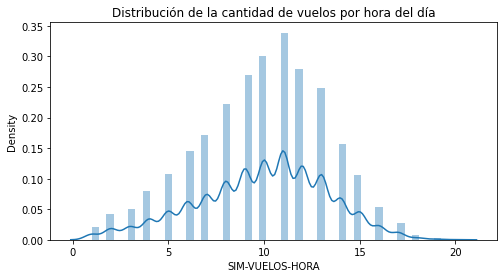

In [50]:
# Basic correlogram
fig, ax =plt.subplots()

sns.distplot(df['SIM-VUELOS-HORA']).set(title = 'Distribución de la cantidad de vuelos por hora del día')

fig.set_figwidth(8)
plt.show()

#### Conclusiones del análisis adicional

- A primera vista, parece que la ciudad de destino es una feature que tiene una alta variabilidad donde hay destinos con un 100% de atrasos. Sin embargo, al inspeccionar en mayor profundidad estos casos, notamos que son destinos que en total estos destinos corresponden a solo 4 vuelos. Los destinos de estos vuelos son Cochabamba (1), Puerto Stanley (1) y Quito (2) y todos estos vuelos fueron operados por LATAM. Aunque estos destinos tengan una alta tasa de retraso, son muy poco frecuentes como para querer generar un impacto allí. Esto permite inferir que puede ser importante considerar qué tan frecuentemente un destino es operado a la hora de predecir el retraso de los vuelos. Es posible que los vuelos menos frecuentes, sean menos prioritarios y por ende suelen atrasarse más. También, dependiendo de lo que se busque lograr con la predicción, podría ser pertinente explorar en detalle si los vuelos menos frecuentes tienen características específicas que permitan agruparlos según, por ejemplo, distancia, la misma cantidad de vuelos asociados a cada destino, tipo de avión, etc. 
- Al revisar, sin embargo, los vuelos con menos de un 1% de tasa de atraso, notamos que también son vuelos poco frecuentes, y que también son vuelos en su mayoría operados por LATAM. Entonces, si bien la cantidad de vuelos por destino o por aerolínea puedan no ser indicadores de atraso, sí podría serlo la cantidad de vuelos simultáneos que hay en la misma hora de cada vuelo. Se crea esta variable para ingresarla al modelo.

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [51]:
# Ajustamos el dataset para que pueda ser utilizado como data de entrenamiento
# Primero convertimos las variables categóricas a dummy
from sklearn.preprocessing import OneHotEncoder

# Para no generar más problemas de dimensionalidad, utilizaremos la variable que indica si el vuelo es LATAM o no, 
# en lugar de utilizar la aerolínea en particular que opera el vuelo
features = ['SIGLADES', 'MES', 'DIA', 'OPERA', 'DIANOM', 'TIPOVUELO', 'periodo_dia', 'temporada_alta', 'SIM-VUELOS-HORA']
features_dummy = ['SIGLADES', 'TIPOVUELO', 'OPERA', 'periodo_dia', 'DIANOM']

one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore',drop = 'if_binary')
df_dummy = one_hot.fit_transform(df[features_dummy])

#Converting back to a dataframe
df_dummy = pd.DataFrame(df_dummy, columns = one_hot.get_feature_names())
#Generamos un dataset con features y otro con la variable predictos
x = pd.concat([df[['SIM-VUELOS-HORA', 'MES', 'DIA', 'temporada_alta']], df_dummy], axis=1)
y = df["atraso_15"]

# Normalmente se debe estandarizar las variables numéricas para que estén en la misma escala pero en este caso solo tenemos una que es numérica por lo que  
# no es necesario ('SIM-VUELOS-HORA)

A continuación probaremos modelos de clasificación para predecir si un vuelo tendrá un atraso de más de 15 minutos o no. Si bien al tener mayoritariamente variables categóricas que se deben convertir en dummies, aumenta la multicolinearidad, este no es un problema para la performance del modelo, sin embargo sí complica la interpretabilidad, ya que no podremos aislar bien el efecto de cada variable independiente sobre la variable dependiente.


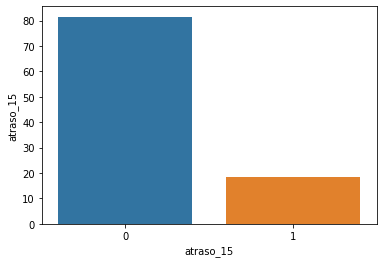

In [52]:
sns.barplot(x='atraso_15', y="atraso_15", data=df, estimator=lambda x: len(x) / len(df) * 100)
fig.show()

Los datos están desbalanceados, la cantidad de casos que hay de vuelos sin atrasos es alrededor de cuatro veces más que la cantidad de casos de vuelos con atrasos. Por esta razón, procederemos a balancear las clases, ya que de no hacerlo estaremos sesgando el entrenamiento. El balanceo de clases solo se aplica a la data de entrenamiento, ya que el objetivo del testeo es ver cómo opera el modelo con la data en sus proporciones originales. Así, primero separaremos el dataset en dos, uno para entrenamiento y otro para testeo, y luego balancearemos las clases solo en el dataset de entrenamiento

Se puede balancear la data creando data ficticia (representativa del grupo) para aumentar los casos de la categoría subrepresentada, o quitando casos para disminuir la categoría sobrerepresentada. En este caso haremos lo primero, ya que la cantidad de datos no permite hacer lo segundo y mantener un buen número de casos para el entrenamiento.

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

#### Regresión Logística

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = grid, cv = 10, verbose=True)

# Fit on data
best_clf = clf.fit(X_train_res, y_train_res)
best_clf.best_estimator_


Fitting 10 folds for each of 40 candidates, totalling 400 fits


LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [56]:
selected_clf = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')
clf_res = selected_clf.fit(X_train_res, y_train_res)
clf_pred = clf_res.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, clf_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.87      0.62      0.73     11081
           1       0.27      0.61      0.37      2558

    accuracy                           0.62     13639
   macro avg       0.57      0.62      0.55     13639
weighted avg       0.76      0.62      0.66     13639



#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

grid = {'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']}

rf = GridSearchCV(RandomForestClassifier(), param_grid = grid, cv = 10, verbose=True)

# Fit on data
best_rf = rf.fit(X_train_res, y_train_res)
best_rf.best_estimator_


Fitting 10 folds for each of 90 candidates, totalling 900 fits


RandomForestClassifier(max_depth=8, n_estimators=500)

In [60]:
selected_rf = RandomForestClassifier(max_depth=8, n_estimators=500)
rf_res = selected_rf.fit(X_train_res, y_train_res)
rf_pred = rf_res.predict(X_test)

In [61]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, rf_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     11081
           1       0.31      0.40      0.35      2558

    accuracy                           0.72     13639
   macro avg       0.58      0.60      0.59     13639
weighted avg       0.75      0.72      0.73     13639



#### Bernoulli Naive Bayes
Existen diferentes modelos Naive Bayes, cada uno asume diferentes distribuciones de la variable dependiente. En este caso nuestra variable predictora es binaria, por lo que lo correcto sería utilizar Bernoulli.

In [62]:
from sklearn.naive_bayes import BernoulliNB

grid = {
    'fit_prior': (True, False)
}

bnb = GridSearchCV(BernoulliNB(), param_grid=grid, verbose=1, cv=10)
bnb.fit(X_train_res, y_train_res)
bnb.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


BernoulliNB(fit_prior=False)

In [63]:
selected_bnb = BernoulliNB(fit_prior=False)
bnb_res = selected_bnb.fit(X_train_res, y_train_res)
bnb_pred = bnb_res.predict(X_test)

In [64]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, bnb_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.85      0.71      0.78     11081
           1       0.27      0.45      0.34      2558

    accuracy                           0.66     13639
   macro avg       0.56      0.58      0.56     13639
weighted avg       0.74      0.66      0.69     13639



#### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier


grid = {
    'n_neighbors': (3, 5, 7),
    'weights': ('uniform', 'distance'),
    'leaf_size': (20, 30),
    'metric': ('jaccard', 'euclidean')
}

knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid, verbose=1, cv=10)
knn.fit(X_train_res, y_train_res)
knn.best_estimator_


Fitting 10 folds for each of 24 candidates, totalling 240 fits


KNeighborsClassifier(leaf_size=20, metric='jaccard', n_neighbors=7,
                     weights='distance')

In [78]:
selected_knn = KNeighborsClassifier(leaf_size=20, metric='jaccard', n_neighbors=7,
                     weights='distance')
knn_res = selected_knn.fit(X_train_res, y_train_res)
knn_pred = knn_res.predict(X_test)

In [79]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, knn_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     11081
           1       0.33      0.13      0.19      2558

    accuracy                           0.79     13639
   macro avg       0.58      0.54      0.53     13639
weighted avg       0.73      0.79      0.75     13639



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
# Obtenemos predicciones sobre datasets de testeo para cada modelo, y sus métricas de precisión, recall y accuracy

# Regresión Logística
clf_pred = clf_res.predict(X_test)
precision_clf, recall_clf, fscore_clf, support_clf = score(y_test, clf_pred, average='macro')
accuracy_clf = accuracy_score(y_test, clf_pred)

# Renadom Forest
rf_pred = rf_res.predict(X_test)
precision_rf, recall_rf, fscore_rf, support_rf = score(y_test, rf_pred, average='macro')
accuracy_rf = accuracy_score(y_test, rf_pred)

# BNB
bnb_pred = bnb_res.predict(X_test)
precision_bnb, recall_bnb, fscore_bnb, support_bnb = score(y_test, bnb_pred, average='macro')
accuracy_bnb = accuracy_score(y_test, bnb_pred)

# KNN
knn_pred = knn_res.predict(X_test)
precision_knn, recall_knn, fscore_knn, support_knn = score(y_test, knn_pred, average='macro')
accuracy_knn = accuracy_score(y_test, knn_pred)

In [81]:
# Creamos dataframe con métricas de evaluación del modelo
data = {'Model': ['LR', 
          'RF', 
          'BNB',
          'K-NN'],
        'Accuracy': [accuracy_clf, 
                     accuracy_rf, 
                     accuracy_bnb, 
                     accuracy_knn],
        'Precision': [precision_clf, 
                     precision_rf, 
                     precision_bnb, 
                     precision_knn],
        'Recall': [recall_clf, 
                     recall_rf, 
                     recall_bnb, 
                     recall_knn],
        'F1-Score': [fscore_clf, 
                     fscore_rf, 
                     fscore_bnb, 
                     fscore_knn]}

model_summary = pd.DataFrame(data=data)

In [82]:
model_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,LR,0.621013,0.572131,0.615217,0.551485
1,RF,0.719921,0.580700,0.597458,0.585603
2,BNB,0.664638,0.557988,0.582379,0.555468
3,K-NN,0.788034,0.578652,0.535038,0.532681


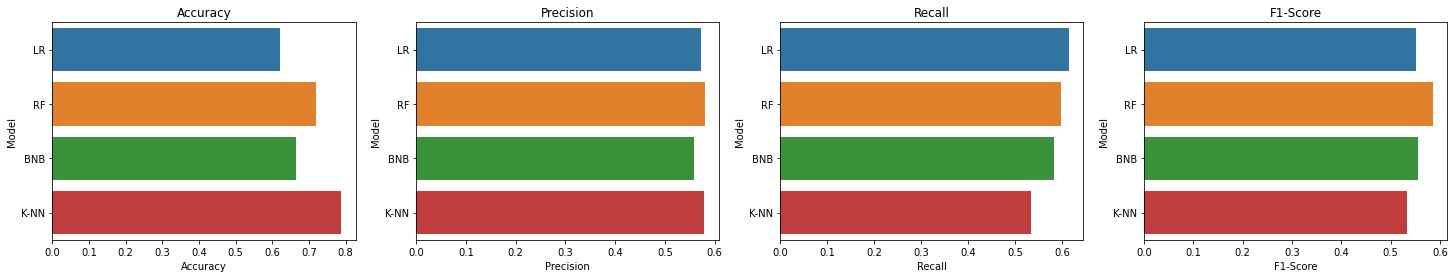

In [83]:
fig, ax =plt.subplots(1, 4)

sns.barplot(x = 'Accuracy', y = 'Model', data = model_summary,
                ax = ax[0]).set(title = 'Accuracy')
sns.barplot(x = 'Precision', y = 'Model', data = model_summary,
                ax = ax[1]).set(title = 'Precision')
sns.barplot(x = 'Recall', y = 'Model', data = model_summary,
                ax = ax[2]).set(title = 'Recall')
sns.barplot(x = 'F1-Score', y = 'Model', data = model_summary,
                ax = ax[3]).set(title = 'F1-Score')

fig.set_figwidth(25)
plt.show()

El mejor modelo es el de Random Forest, miraremos en más detalle la matriz de confusión y la importancia asignada a las features.

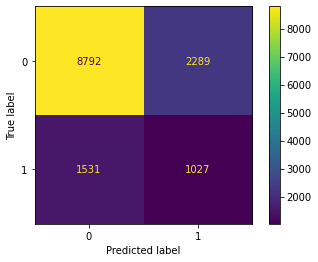

In [84]:
plot_confusion_matrix(rf_res, X_test, y_test) 

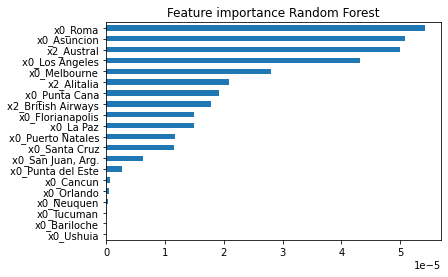

In [85]:
feature_importance = rf_res.feature_importances_
feature_importance = pd.Series(feature_importance, index=X_train_res.columns).sort_values()[:20]
feature_importance.plot.barh()
plt.title('Feature importance Random Forest')
plt.show()

#### Respuesta

*¿Qué performance tienen los modelos?*

- La performance lograda de los modelos no es buena, ninguno logra predecir los atrasos en más de un 30% de los casos.
- En cuanto a accuracy, el mejor modelo es el de Random Forest, pero si queremos tener un buen balance entre precision y recall para asegurarnos que haya la mejor distribución posible entre verdaderos y falsos positivos es importante también fijarnos en el F1-Score, pero Random Fores también tiene el mejor F1-Score, por lo tanto es el mejor modelo.
- Es importante tener en cuenta que también es el modelo que toma más tiempo de entrenamiento, así es que si es una limitación, se debería probar mejorar otros modelos que ajustan más rápido.

*¿Qué métricas usaste para evaluar esa performance y por qué?*

- Para evaluar performance se utiliza mucho el accuracy, que es una medida general de desempeño del modelo ya que revisa el porcentaje de acierto. Sin embargo, no siempre es lo más útil de evaluar, ya que dependiendo del caso podríamos preferir tener algunos falsos positivos con tal de lograr detectar una mayor cantidad de verdaderos positivos, mientras que en otros casos podríamos necesitar que no hayan falsos positivos a costa de detectar menos verdaderos positivos.
- En este caso, desconocemos para qué se está realizando la predicción de atrasos, pero podría ser para alertar anticipadamente a los clientes que hay una demora, y tratar de compensar. Si lo que nos importa es no compensar innecesariamente pasajeros ni alarmarnos de forma indebida, podríamos querer priorizar evitar los falsos positivos y para ello tendríamos que fijarnos en el Recall, en lugar del accuracy. Si, en cambio, los vuelos con probabilidad de atraso recibirán una inspección adicional que no genera demasiados costos a la compañía, entonces podríamos preferir tener un mayor nivel de Precision, es decir que de todas las predicciones detecte la mayor cantidad posible de verdaderos positivos.
- Vamos a asumir que en este caso nos importa en igual medida la precisión y el recall, en ese caso lo que más nos importa evaluar en los modelos es el F1-Score, que combina los resultados del precision y el recall.
- De acuerdo a lo anterior, el mejor modelo es el de Random Forest ya que tiene una puntuación F-1 Score más alta, además su accuracy no es del todo bajo (.72). Sin embargo, miramos en detalle este modelo vemos que aún así su performance no es buena. La matriz de confusión indica que del total de atrasos reales solo predice correctamente el 40%. 

*¿Por qué elegiste esos algoritmos en particular?*

- Los modelos fueron escogidos por ser algoritmos de clasificación que han demostrado un buen desempeño en predecir problemas de clasificación binaria. En particular para el algoritmo de Naive Bayes, existen variantes para resolver problemas de diferente tipo, pero al tratarse de un problema de clasificación binaria se utiliza el supuesto de que los datos tienen una distribución tipo Bernoulli.
- Los modelos elegidos además son muy diferentes en el approach que utilizan para realizar la clasificación, tenemos un modelo basado en regresión, otro que intenta clasificar a partir de vecinos más cercanos, un modelo de ensamblaje (Random Forest) y un modelo que utiliza las probabilidades condicionales y capaz de considerar priors. Por lo tanto, la decisión de elegir estos modelos fue una combinación de elegir aquellos que han tenido mejor desempeño para predecir problemas de clasificación binaria en la literatura y tener modelos que resuelven el problema de clasificación con métodos distintos.

*¿Qué variables son las que más influyen en la predicción?*

- Las variables que más inciden en la predicción son algunos destinos, en su mayoría corresponden a vuelos internacionales no regionales. 
- Además, aparece como un predictor importante el que la compañía que opera el vuela sea o no British Airways. 

*¿Cómo podrías mejorar la performance?*

- Gran parte del modelamiento tiene que ver con pensar correctamente el problema que queremos solucionar y seleccionar la data más adecuada. En el caso de predicción de atrasos, agregaría más features para mejorar la performance del modelo, además de reevaluar el valor de los parámetros elegidos en cada uno.
- Sería importante evaluar con el negocio qué tipos de datos adicionales se pueden obtener, y cuánto tiempo de anticipación se necesita hacer la predicción, si se requiere de algún tipo de integración, etc. Esto ayudará a tomar mejores decisiones sobre qué algoritmos utilizar y sobre cuáles son las features más adecuadas de incorporar.
- Features que podrían agregarse y que podrían ayudar a mejorar la performance del modelo son las siguientes:
    * Si cada vuelo corresponde a uno de conexión o directo
    * El clima de la ciudad de origen y de la ciudad de destino, puede ser temperatura, vientos, humedad, etc.
    * Distancia entre la ciudad de origen y al ciudad de destino
    * Características del avión que opera el vuelo, como por ejemplo el modelo.